<a href="https://colab.research.google.com/github/kapilpriya01/priya-kapil/blob/master/Projects/CarsData_EDA_CP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EDA on Car Sales

### Table of Content

1. [Problem Statement](#section1)</br>
2. [Importing Packages](#section2)<br>
3. [Loading Data Set](#section3)<br>
  3.1 [Description of Data Set](#section3.1)<br>
  3.2 [Data Info](#section3.2)<br>
4. [Data Profiling](#section4)<br>
5. [Data Pre-Processing](#section5)<br>
  5.1 [Dropping Duplicates](#section5.1)<br>
  5.2 [Handling Drive](#section5.2)<br>
  5.3 [Handling Price](#section5.3)<br>
  5.4 [Handling EngV or Engine Capaciy](#section5.4)<br>
  5.5 [Handling Mileage](#section5.5)<br>
6. [Exploratory Data Analysis](#section6)<br>
  6.1 [Analysis based on Drive classification](#section6.1)<br>
    6.1.1 [Which drive type is prefered most?](#section6.1.1)<br>
    6.1.2 [What is maximum mileage of Front Wheel Drive car?](#section6.1.2)<br>
  6.2 [Registered cars](#section6.2)<br>
    6.2.1 [Analysing not registered cars](#section6.2.1)<br>
  6.3 [Yearly car sales trend](#section6.3)<br>
  6.4 [The most powerful and fastest car](#section6.4)<br>
  6.5 [Most prefered engine types](#section6.5)<br>
  6.6 [The most expensive car](#section6.6)<br>
  6.7 [Price trend over years](#section6.7)<br>
7. [Conclusion](#section7)<br>


<a id=section1></a> 
## 1. Problem Statement 

A raw data of car sales collected over a period of time of almost more than 50 years and having a huge variety. So agenda is to find out the insights of this data to gain out some relevant information

## 2. Importing Packages

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
import seaborn as sb
import warnings
import squarify
from wordcloud import WordCloud

In [0]:
warnings.filterwarnings('ignore')                                       #ignoring warnings

## 3. Loading Data Set

In [0]:
cars_df_original = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding='latin-1')
cars_df = cars_df_original                                         # making a copy of original data
cars_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### 3.1 Description of Data Set 

| Column Name                    | Description           |
| -------------------------------|:-----------------------------------------------:| 
| car                            | Name of the brand car belongs to| 
| price                          | price of corresponding car|
| body                           | Body Type (sedan, crossover, hatch)|
| mileage                        | Car Mileage (km per litre)|
| EngV                           | Engine Capacity|
| engType                        | Engine Type (Petrol, Diesal, Gas)|
| registration                   | Registered Cars|
| year                           | Year of Car Registered|
| model                          | Corresponding car brand's model|
| drive                          | Drive Type of wheels (Front, Full, Rear)|

In [0]:
cars_df.describe(include = 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


### 3.2 Data Info

In [0]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


- ```info``` states that there are 10 columns in which 
    - Year and Mileage columns are numerical discrete
    - EngV an Price are numerical Continuous
    - rest 6 are object type or categorical

## 4. Data Profiling

In [0]:
cars_df_profiling = cars_df.profile_report(title = "Pre-Profiling Report")
cars_df_profiling.to_file(output_file='cars_pre_Profiling.html')

Pre-profiling gave an insight that
- There re 113 rows i.e. **1.2% of data has duplicate rows**
- 87 types of cars 
- **Mileage and Price has 0 values**
- **Missing values** in **EngV(4.5%) and Drive (5.3%)**
- **EngV has many outliers** at both extreme ends (< 1 and > 74)
- **mileage has outliers** as no car can travel 900kms/miles per litre
- **Car** Types and their corresposing **Models** have **extremely high cardinality**


## 5. Data Pre-Processing

### 5.1 Dropping Duplicates

In [0]:
cars_df = cars_df.drop_duplicates() # original : (9576, 10)

In [0]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
car             9463 non-null object
price           9463 non-null float64
body            9463 non-null object
mileage         9463 non-null int64
engV            9029 non-null float64
engType         9463 non-null object
registration    9463 non-null object
year            9463 non-null int64
model           9463 non-null object
drive           8953 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


- **Removing all the duplicate rows** to get rid of repeatitive data which is of no use
- **New data is of 9463 (earlier 9576) rows and 10 columns**

In [0]:
#cars_df.model = cars_df.car + " " + cars_df.model # mergind adding car names to model columns

### 5.2 Handling Drive

In [0]:
cars_df.drive.unique()

array(['full', 'rear', 'front', nan], dtype=object)

In [0]:
cars_df['drive'].fillna('others', inplace = True) 
cars_df.drive.unique()

array(['full', 'rear', 'front', 'others'], dtype=object)

- **Replaced missing Nan values with others**  as missing data can not be interpreted and is undetermined

### 5.3 Handling Price 

In [0]:
print("cars mean: ",cars_df.price.mean())
print("cars median: ",cars_df.price.median())

cars mean:  15303.858895873407
cars median:  9200.0


- Since, Cars 'mean' is very large as compared to 'median' as Extreme values of cars prices are pulling mean towards itself 
- There are 2.8% missing car price values
- **Replace car price having 0 values by median**

In [0]:
cars_df = cars_df.round(decimals = 3) 
cars_df['price'].replace(0, cars_df.price.median(), inplace = True)
cars_df.price.sample(10)                         # takes a random sample of 10 price values

5962     4800.0
7049     2499.0
6623    16200.0
8502    39000.0
1491    22000.0
6368    24500.0
2174    12500.0
2843    27500.0
2899     5300.0
1233    17400.0
Name: price, dtype: float64

### 5.4 Handling EngV or Engine Capacity

- EngV has many outliers **as engine capacity**  of a car **can not be greater 15**
- **ENgV has 434 missing values** 
- replacing missing values and values > 15 by mean 

In [0]:
(len(cars_df[cars_df['engV'] >= 15])/ len(cars_df.engV))*100           # 0.5% data of engV > 15

0.5178061925393639

In [0]:
cars_df['engV'].loc[cars_df['engV'] >= 15] = cars_df.engV.mean()       # replacing all engV values>=15

In [0]:
cars_df.engV.fillna(0, inplace = True)                         # replacing all Nan values by mean
cars_df['engV'].loc[cars_df['engV'] == 0] = cars_df.engV.mean()
cars_df.engV.sort_values().unique()

array([ 0.1       ,  0.11      ,  0.14      ,  0.6       ,  0.65      ,
        0.7       ,  0.8       ,  0.9       ,  1.        ,  1.1       ,
        1.12      ,  1.2       ,  1.23      ,  1.24      ,  1.25      ,
        1.3       ,  1.31      ,  1.33      ,  1.34      ,  1.35      ,
        1.36      ,  1.39      ,  1.4       ,  1.45      ,  1.46      ,
        1.5       ,  1.59      ,  1.6       ,  1.7       ,  1.78      ,
        1.79      ,  1.8       ,  1.9       ,  1.91      ,  2.        ,
        2.1       ,  2.14      ,  2.14829449,  2.15      ,  2.17      ,
        2.2       ,  2.28      ,  2.3       ,  2.4       ,  2.44      ,
        2.46      ,  2.49      ,  2.5       ,  2.57      ,  2.6       ,
        2.64144424,  2.69      ,  2.7       ,  2.8       ,  2.9       ,
        2.98      ,  2.99      ,  3.        ,  3.1       ,  3.2       ,
        3.3       ,  3.4       ,  3.5       ,  3.6       ,  3.7       ,
        3.8       ,  4.        ,  4.2       ,  4.25      ,  4.3 

### 5.5 Handling Mileage

- **Replacing 0 mileage** with median
- **Replacing mileage above 400** with median as they are outliers affecting data. No car mileage can have 800 value

In [0]:
cars_df['mileage'].loc[cars_df['mileage'] == 0] = cars_df.mileage.median()
cars_df['mileage'].loc[cars_df['mileage'] >= 400] = cars_df.mileage.median()
cars_df.mileage.sort_values().unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [0]:
cars_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.500000,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.800000,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.500000,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.800000,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.148294,Other,yes,2013,E-Class,others


In [0]:
cars_df_post_profiling = cars_df.profile_report(title = "Post-Profiling Report")
cars_df_post_profiling.to_file(output_file='cars_post_Profiling.html')

## 6. Exploratory Data Analysis

### 6.1 Analysis based on Drive classification

#### 6.1.1 Which drive type is prefered most?

Text(0, 0.5, 'Drive Type')

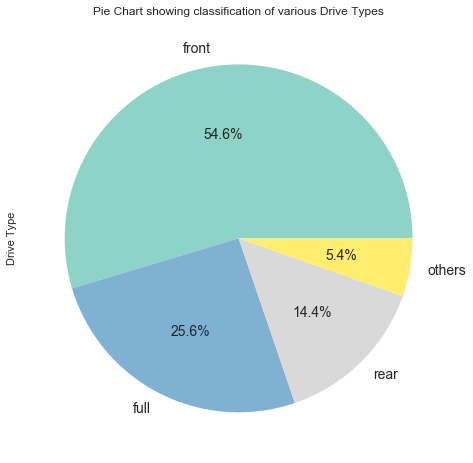

In [0]:
cars_df['drive'].value_counts().plot(kind = 'pie', autopct = '%3.1f%%',cmap = "Set3", figsize = (8,8), fontsize = 14)
plt.title ("Pie Chart showing classification of various Drive Types")
plt.ylabel("Drive Type")

- Front-wheel drive reduces overall weight of the car, decreases production costs, and improves fuel economy compared to a rear-wheel-drive system and thus majority of people **prefer Front Drive vehicles**

#### 6.1.2 What is maximum mileage of Front Wheel Drive car?

In [0]:
cars_drive_front_df = cars_df.loc[cars_df['drive'] == 'front']
cars_drive_front_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
3,Mercedes-Benz,17800.000,van,162.0,1.800000,Diesel,yes,2012,B 180,front
6,Honda,6500.000,sedan,199.0,2.000000,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185.0,1.500000,Diesel,yes,2011,Megane,front
10,Nissan,20447.154,crossover,129.0,1.200000,Petrol,yes,2016,Qashqai,front
30,Nissan,13980.000,hatch,31.0,2.148294,Other,yes,2013,Leaf,front


In [0]:
# Removing all the columns except the one which is needed
cars_drive_front_df.drop(columns=['price','engV','year','engType','registration','model'], inplace=True)
cars_drive_front_df.sort_values(by = 'mileage', ascending = False).head()

,car,body,mileage,drive
5760,Opel,sedan,398.0,front
9024,Mercedes-Benz,van,396.0,front
503,Mercedes-Benz,van,395.0,front
7807,Opel,vagon,392.0,front
6491,Audi,sedan,390.0,front


Text(0, 0.5, 'Mileage')

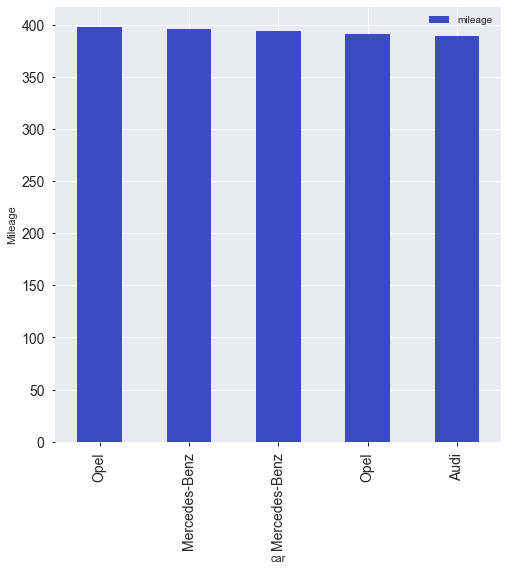

In [0]:
cars_drive_front_df.sort_values(by = 'mileage', ascending = False).head().plot(kind = 'bar', x = 'car', figsize = (8,8), fontsize = 14,cmap = "coolwarm")
plt.xlabel("car")
plt.ylabel("Mileage")

- **Opel car has the highest mileage of 398 followd by Mercedes-benz**

### 6.2 Registered cars 

Text(0, 0.5, 'numbers of buyers')

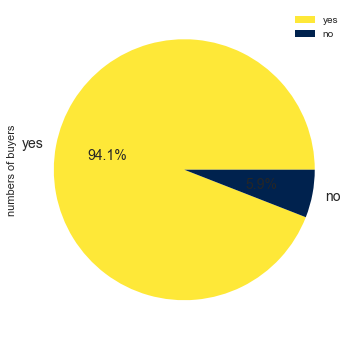

In [0]:
# checking the percentage of registered cars
cars_df['registration'].value_counts().plot(kind = 'pie',autopct = '%3.1f%%', colormap = 'cividis_r', legend = True,figsize = (6,6),fontsize = 14)
plt.ylabel("numbers of buyers")

#### 6.2.1 Analysing not registered cars

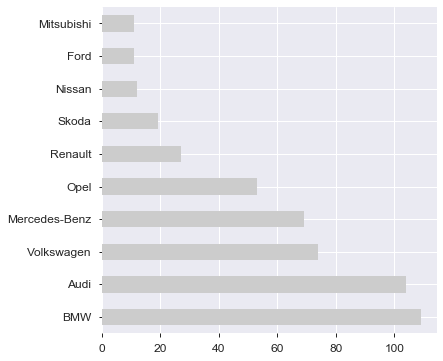

In [0]:
cars_df_notRegistered = cars_df.loc[cars_df['registration'] == 'no']
cars_df_notRegistered.car.value_counts().head(10).plot(kind = 'barh',colormap = 'Pastel2_r', figsize = (6,6),fontsize = 12)

- **BMW and AUDI are the most unregistered cars**. As they are extremely luxury and costly so seems like they might get stolen frequently

### 6.3 Yearly car sales trend

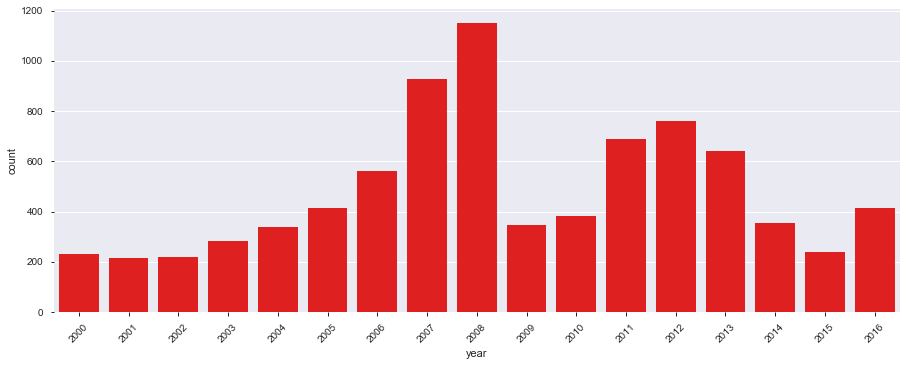

In [0]:
cars_year_loc = cars_df.loc[cars_df['year'] >= 2000]

test = sb.factorplot('year',data = cars_year_loc,aspect=2.5, kind='count',color="r")
test.set_xticklabels(rotation=45)

- When yearly car sales trend has been checked, Maximum cars were sold in year 2008 

### 6.4 The most powerful and fastest car

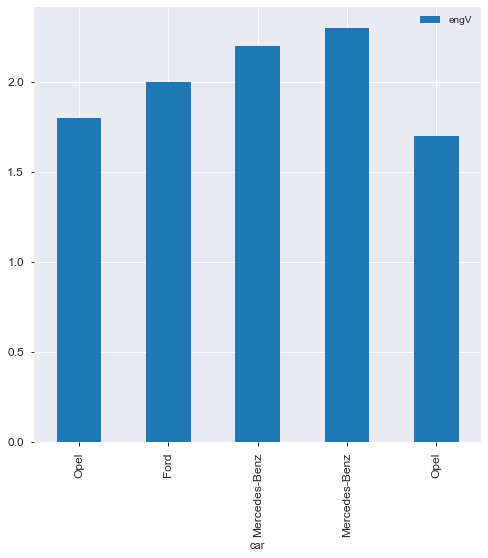

In [0]:
cars_powerful_df = cars_df.sort_values(by = ['mileage','price','engV'],ascending= False)
#cars_df.sort_values(by = ['mileage','price','engine capacity'],ascending= False)
cars_powerful_df.head(5).plot(kind = 'bar', x = "car", y = "engV", figsize = (8,8), fontsize = 12)

- The **most powerful car** based on various paramaters like best mileage, best price and best engine capacity, **Mercedes-Benz** gets on the top. 

### 6.5 Most prefered engine types

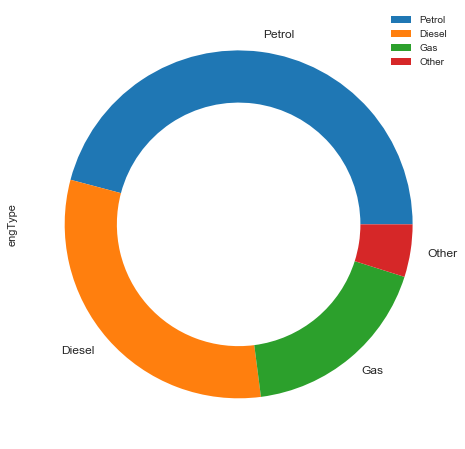

In [0]:
cars_df.engType.value_counts().plot(kind = "pie", figsize = (8,8),wedgeprops = dict(width = 0.3), fontsize = 12, legend = True)

- **Petrol is the most preffered** 

- Let's take an average of prices of all engine types to get some more insight 

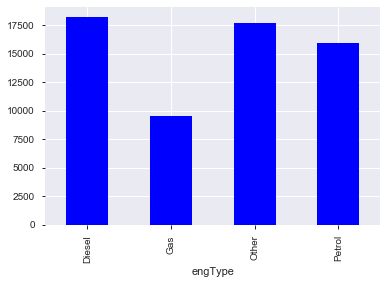

In [0]:
price_df = cars_df
price_df.groupby(['engType'])['price'].mean().plot(kind='bar', color='blue')

- **Petrol cars are cheaper than Diesel Ones**
- Petrol engines tend to be less noisy
- COst of registration of petrol car is less than Diesel

### 6.6 The most expensive car

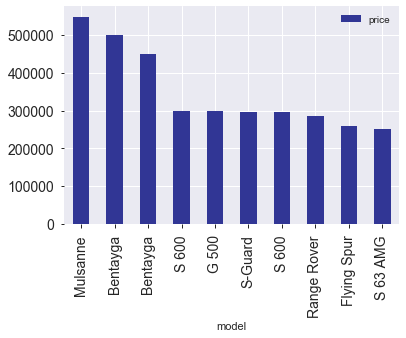

In [0]:
# based on the maximum registrations of a particular car model
cars_price_df = cars_df.sort_values(by = ['price'], ascending = False)
cars_price_df.head(10).plot(kind = 'bar',x = 'model', y = 'price',fontsize = 14,colormap = 'RdYlBu_r')

- **Bentley Mulsanne and Bentley Bentayga is the most expensive and luxurious car** of the world 

### 6.7 Price trend over years

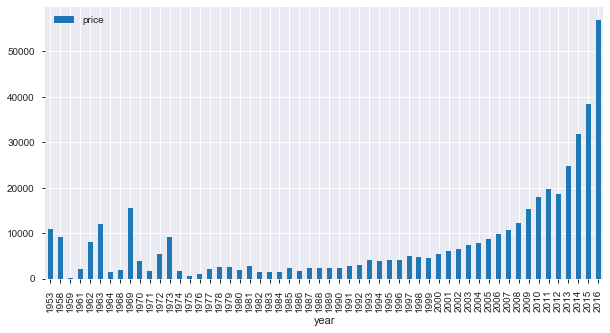

In [0]:
car_sales_df = cars_df
car_sales_df.groupby(['year'])[["price"]].mean().plot(kind = 'bar', fontsize = 10, figsize = (10,5))

- After checking the price trend over years, we can analyse that price icreases exponentially with years

## 7. Conclusion

After analysing the above data, it is inferred that 

* With year, **car price gets increased exponentially** and in future this could go beyond our imaginable ranges
* **Majority of people have registered cars** but there are few are non registered cars also. 
    * **Actionable insight**
        * BMW and AUDI tops in this list so company must introduce more safety features 
* **2008 was the exceptional year which had most of the number of sales in pas 60 years** 
* **Bentley** leads the **most expensive cars** of the world
* Most **economic engine type is Petrol** as Petrol cars are cheaper and registration fee of petrol is also lesser as compared to Diesal engine cars.
* When it is about Car Drive Types, **Front Wheel Drive** is most optimal choice and most prefferred one
    * In Front Wheen Drive, Opel car has the highest mileage

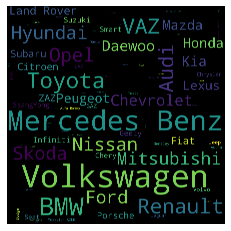

<Figure size 72x72 with 0 Axes>

In [0]:
text= cars_df.car.to_string()
 
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,scale=9).generate(text)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.figure( figsize=(1,1))
plt.show()